Implementation-Canny Edge detection

In [17]:
import cv2
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import matplotlib.pyplot as plt


In [18]:
img_path = r'C:\Users\maxwe\Documents\Github repos\ChemProject\OriginalCharts\35.0C original.png'
#Reading the image
image = cv2.imread(img_path)
(H, W) = image.shape[:2]
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Perform the canny operator
canny = cv2.Canny(blurred, 30, 150)

(-0.5, 971.5, 927.5, -0.5)

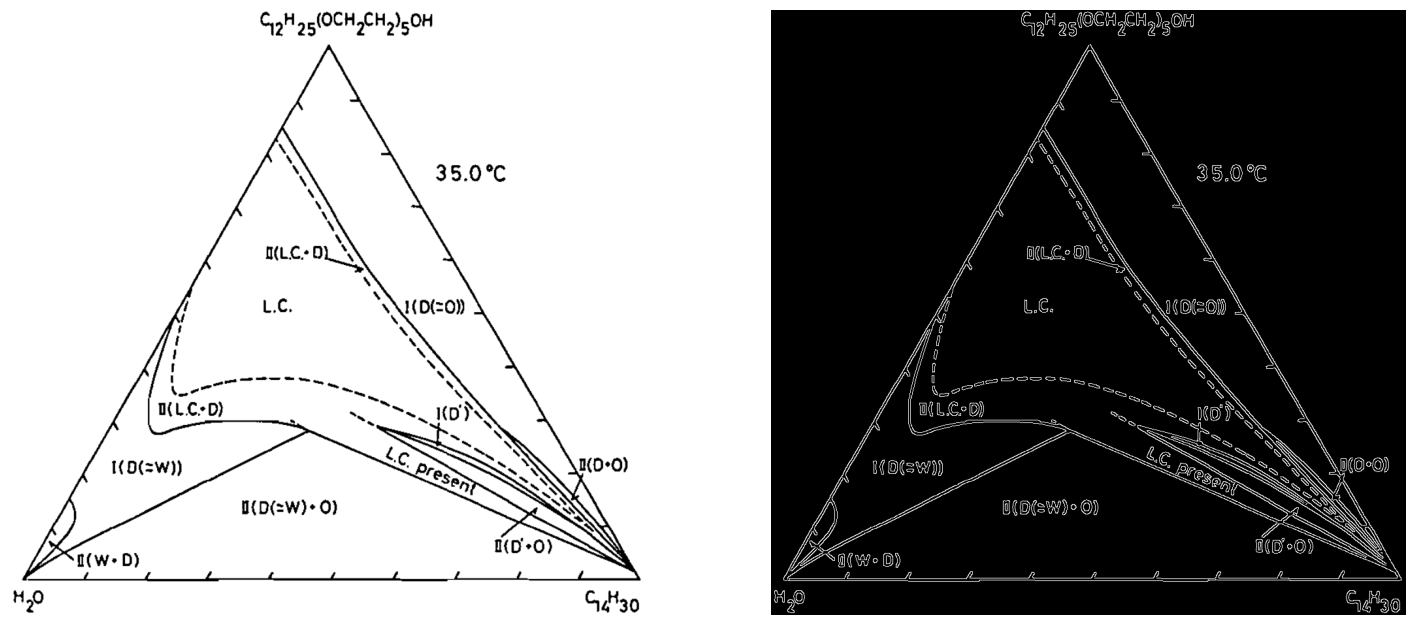

In [19]:
fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(gray,cmap='gray')
ax[1].imshow(canny,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

Implementation-HED

In [20]:
#This class helps in cropping the specified coordinated in the function
class CropLayer(object):
    def __init__(self, params, blobs):
        # initialize our starting and ending (x, y)-coordinates of
        self.startX = 0
        self.startY = 0
        self.endX = 0
        self.endY = 0
    def getMemoryShapes(self, inputs):
        (inputShape, targetShape) = (inputs[0], inputs[1])
        (batchSize, numChannels) = (inputShape[0], inputShape[1])
        (H, W) = (targetShape[2], targetShape[3])
        # compute the starting and ending crop coordinates
        self.startX = int((inputShape[3] - targetShape[3]) / 2)
        self.startY = int((inputShape[2] - targetShape[2]) / 2)
        self.endX = self.startX + W
        self.endY = self.startY + H
        # return the shape of the volume (we'll perform the actual
        # crop during the forward pass
        return [[batchSize, numChannels, H, W]]
    def forward(self, inputs):
        return [inputs[0][:, :, self.startY:self.endY,self.startX:self.endX]]

Now we read our image and pass it through the algorithm.

In [21]:
#The caffemodel contains the model of the architecture and the deploy.prototxt contains the weights
protoPath = 'C:/Users/maxwe/Documents/Github repos/ChemProject/deploy.prototxt'
modelPath = 'C:/Users/maxwe/Documents/Github repos/ChemProject/hed-edge-detector-master/hed_pretrained_bsds.caffemodel'
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)
# register our new layer with the model
cv2.dnn_registerLayer("Crop", CropLayer)

: 

: 

Now we read our image and pass it through the algorithm.

In [ ]:
#Input image is converted to a blog
blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(W, H),mean=(104.00698793, 116.66876762, 122.67891434),swapRB=False, crop=False)
#We pass the blob into the network and make a forward pass
net.setInput(blob)
hed = net.forward()
hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")

We read our actual image, which consists of edges

In [ ]:
test_y_path = 'C:/Users/maxwe/Documents/Github repos/ChemProject/OriginalCharts/40.0C original.png'
test_y = cv2.imread(test_y_path)
#The test image has its third dimesion as 3
#So we are extractin only one dimension
test_y = test_y[:,:,0]

We normalize the images so that the MSE value does not shoot up!!

In [ ]:
#Normalising all the images
test_y = test_y/255
hed = hed/255
canny = canny/255
gray = gray/255

We now visualize our results

(-0.5, 971.5, 927.5, -0.5)

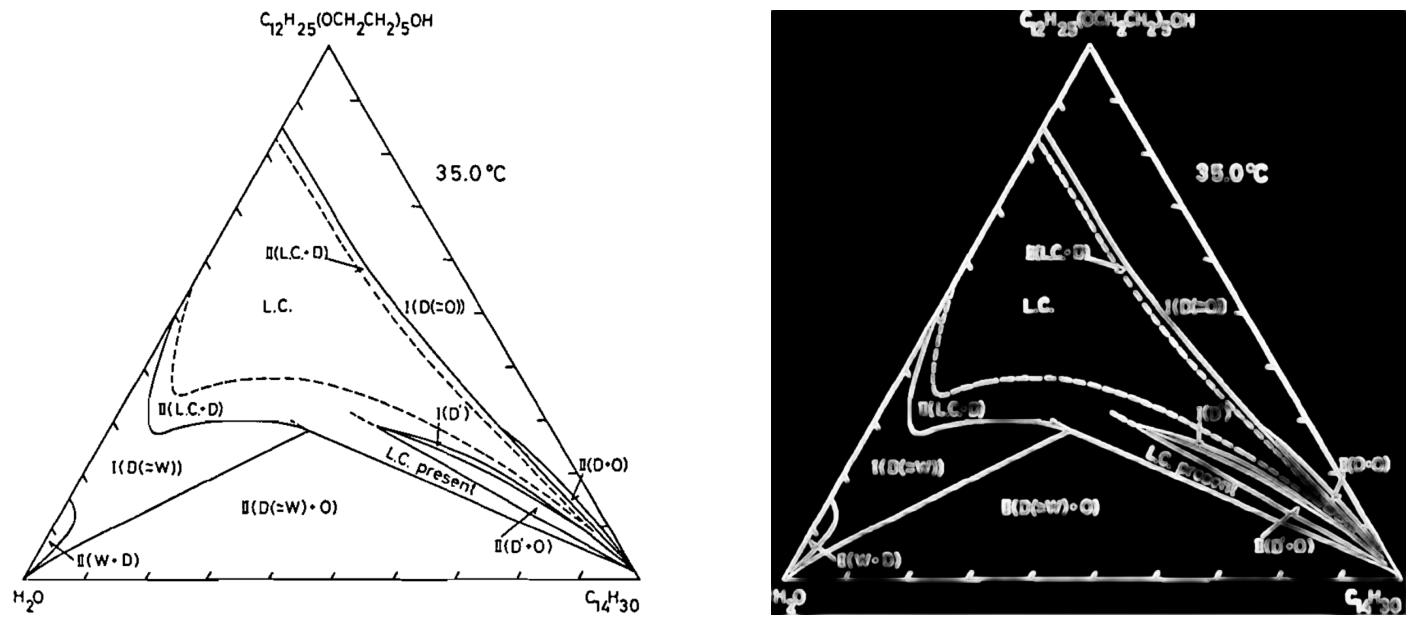

In [ ]:
fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(gray,cmap='gray')
ax[1].imshow(hed,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

And finally, we compute the metrics and compare our results

In [ ]:
#Calculating metrics between actual test image and the output we got through Canny edge detection
print(mean_squared_error(test_y,canny),peak_signal_noise_ratio(test_y,canny),structural_similarity(test_y,canny))
#Calculating metrics between actual test image and the output we got through HED
print(mean_squared_error(test_y,hed),peak_signal_noise_ratio(test_y,hed),structural_similarity(test_y,hed))

0.9338887770457788 0.29704843675213616 -0.0017901613323823126
0.8863406606222011 0.5239932710456506 -0.004855960281435766


Edge detection with OPENCV

https://learnopencv.com/edge-detection-using-opencv/

In [ ]:
# Read the original image
img = cv2.imread("C:/Users/maxwe/Documents/Github repos/ChemProject/OriginalCharts/40.0C original.png",flags=0)  
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img,(3,3), sigmaX=0, sigmaY=0)

In [ ]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
 

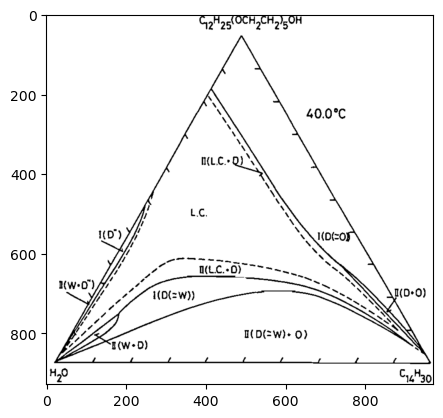

In [ ]:
import cv2
import matplotlib.pyplot as plt
 
# Read the original image
img = cv2.imread("C:/Users/maxwe/Documents/Github repos/ChemProject/OriginalCharts/40.0C original.png")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image


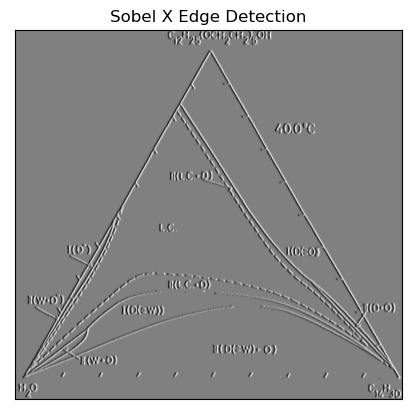

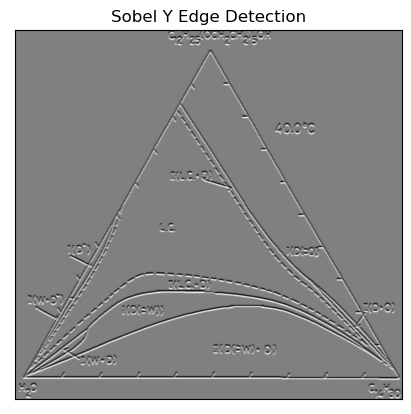

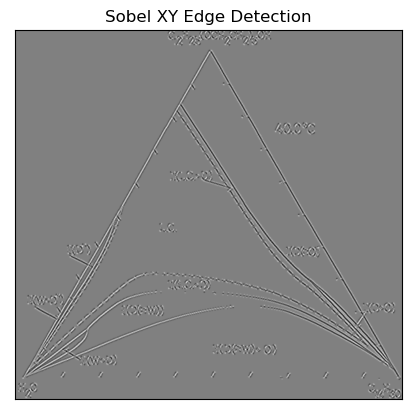

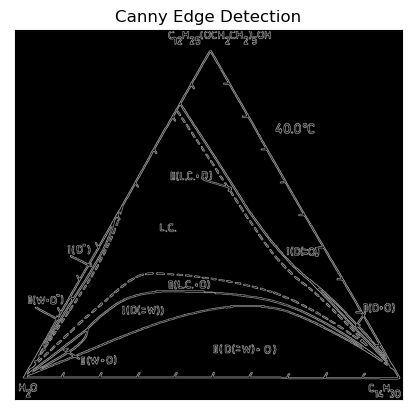

In [ ]:
# Display Sobel X Edge Detection Image with Title
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X Edge Detection')
plt.xticks([])
plt.yticks([])
plt.show()

# Display Sobel Y Edge Detection Image with Title
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y Edge Detection')
plt.xticks([])
plt.yticks([])
plt.show()

# Display Sobel XY Edge Detection Image with Title
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel XY Edge Detection')
plt.xticks([])
plt.yticks([])
plt.show()

# Display Canny Edge Detection Image with Title
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.xticks([])
plt.yticks([])
plt.show()


Remove Text from Images using CV2 and Keras-OCR

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr


pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read("C:/Users/maxwe/Documents/Github repos/ChemProject/OriginalCharts/40.0C original.png")
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates